# - Feature Engineering

# 1- Missing Values

In [1]:
## why are there missing values???
# 1- they hesitate to put the information
# 2- Survey information is not valid
# 3- Men donot tell accurate salary
# 4- Women hide their ages
# 5- might be some poeple died

In [2]:
## Data that will be missing
# 1- continuous data
# 2- categorical data

## What are the different types of Missing Data?

### Missing Completely at Random, MCAR:  A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

###  Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.



In [3]:
import pandas as pd

In [4]:
dataset=pd.read_csv('Titanic.csv')

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.isnull().sum()
#Age, Cabin and Embarked have got missing values in it

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#here we cn see that there is relationship netween the age and cabin because the data was
#collected after the incident so it might be possible that the one who didnot survive so who is
#gonna tell their age and if they have died and might be living in that cabin so we wont be having their cabin as well
## so cabin and age are MNAR


In [8]:
dataset[dataset['Embarked'].isnull()]
# it shows no relation of embarked with tage and cabin so MCAR

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
# we will replace nan with the 1 and others with no nan will be 0
import numpy as np
dataset['cabin_nan']=np.where(dataset['Cabin'].isnull(),1,0)

In [10]:
dataset['cabin_nan'].mean()

0.7710437710437711

In [11]:
dataset.groupby(['Survived'])['cabin_nan'].mean()
#the one who survived has got missing values of 60 % and who didnot have 87% missing values so it could be concluded that the one who survived has got less values than the one who didnot so its true

Survived
0    0.876138
1    0.602339
Name: cabin_nan, dtype: float64

## All the techniques of handling missing values

##### 1. Mean/ Median/Mode replacement
##### 2. Random Sample Imputation
##### 3. Capturing NAN values with a new feature
##### 4. End of Distribution imputation
##### 5. Arbitrary imputation
##### 6. Frequent categories imputation

## Mean/Median/Mode imputation

###### When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [12]:
df=pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)


In [17]:
impute_nan(df,'Age',median)

In [16]:
median=df.Age.median()
median

28.0

In [18]:
# now to check what is the difference created by replacing it with the median
print('Age std', df['Age'].std())
print('Age-median std', df['Age_median'].std())

Age std 14.526497332334044
Age-median std 13.019696550973194


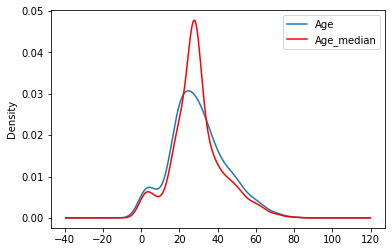

In [19]:
#now we check it by graphically
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


## Random Sample Imputation

 Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)


In [20]:
df=pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])

In [21]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
df.Age.isnull().sum()

177

In [23]:
#sirf df.age.dropna.sample() likhne se eik he value arhi thi
#sample takes n where n is the number of values which should be returned by sample
#this line of code means that kai jo values nan ko drop krne ka baad bach gayi ha un ma se
#177 values ka sample nikal lo aur sample calculate krlo
df.Age.dropna().sample(df.Age.isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [24]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    ##filling the nan values with the random_sample
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    df[variable+'_random']=df[variable].fillna(random_sample)


In [25]:
median=df.Age.median()
impute_nan(df,'Age', median)

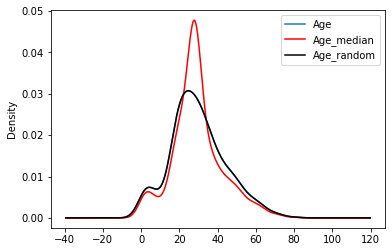

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='black')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


Advantages

    Easy To implement
    There is less distortion in variance

Disadvantage

    Every situation randomness wont work




### Capturing NAN values with a new feature

It works well if the data are not missing completely at random


In [27]:
df=pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
df['Age_Nan']=np.where(df['Age'].isnull(),1,0)

In [29]:
df.head(10)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0



Advantages

    Easy to implement
    Captures the importance of missing values

Disadvantages

    Creating Additional Features(Curse of Dimensionality)




## End of Distribution imputation


In [30]:
df=pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

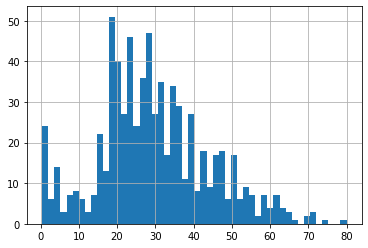

In [31]:
#we want to replace the nan values with the far end values eg: 70-80
df.Age.hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

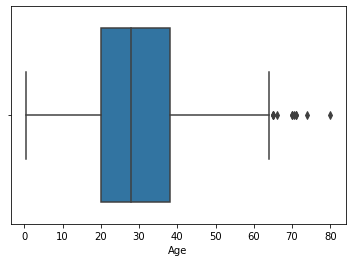

In [32]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [33]:
end_distribution=df.Age.mean()+3*df.Age.std()

In [34]:
def Impute_end_distribution(df,variable,median,end_distribution):
    df[variable+'_end_distribution']=df[variable].fillna(end_distribution)
    df[variable]=df[variable].fillna(median)
    

In [35]:
median=df.Age.median()

Impute_end_distribution(df,'Age',median,end_distribution)

In [36]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

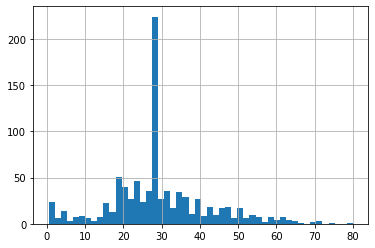

In [37]:
#so there is a distortion where we are getting a peak value at its mean
df.Age.hist(bins=50)

<AxesSubplot:>

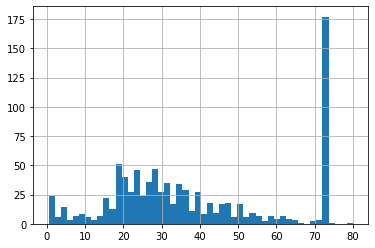

In [38]:
#we get a peak value in the end of the data becz we replaced it with the end value
df.Age_end_distribution.hist(bins=50)

In [ ]:
## which technique is better replacing it with median or end distribtuion

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

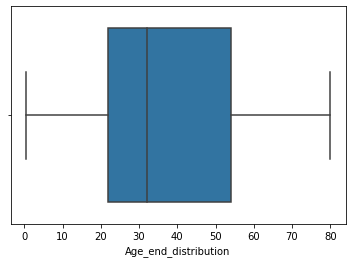

In [39]:
#as you can see with this technique the outliers were removed
sns.boxplot('Age_end_distribution', data=df)

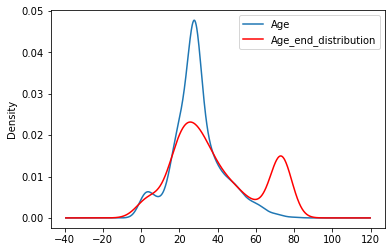

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_end_distribution'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
#our data that we converted using end_dist has now been right skewed


### Arbitrary Value Imputation

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value


In [41]:
import pandas as pd

In [42]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

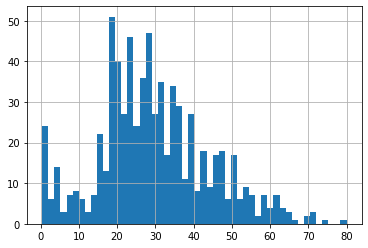

In [43]:
df.Age.hist(bins=50)
#Arbirtrary:
## it is the value which should not be frequently present

In [44]:
def impute_nan(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)
    df[variable+'_zero']=df[variable].fillna(0)

In [45]:
impute_nan(df,'Age')

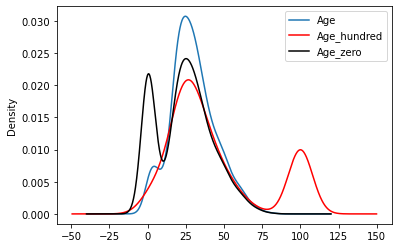

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_hundred'].plot(kind='kde', ax=ax, color='red')
df['Age_zero'].plot(kind='kde', ax=ax, color='black')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


### Advantages

##### .    Easy to implement
##### .    Captures the importance of missingess if there is one

### Disadvantages

##### .    Distorts the original distribution of the variable
##### .    If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
##### .    Hard to decide which value to use



### How to handle categorical features

### Frequent Category Imputation

In [47]:
import pandas as pd

In [52]:
#we picked up the categorical features
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [53]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [54]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [55]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [56]:
#now we check the most frequnet values in our null features

<AxesSubplot:>

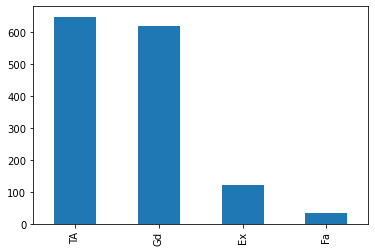

In [59]:
df['BsmtQual'].value_counts().plot.bar()
#here TA was the most frequent value in bsmtqual

<AxesSubplot:>

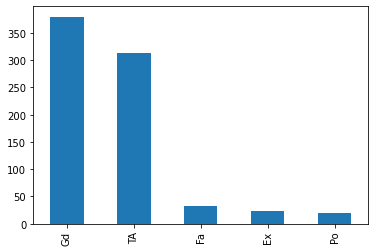

In [60]:
df['FireplaceQu'].value_counts().plot.bar()
#here Gd is the most frequent value

<AxesSubplot:>

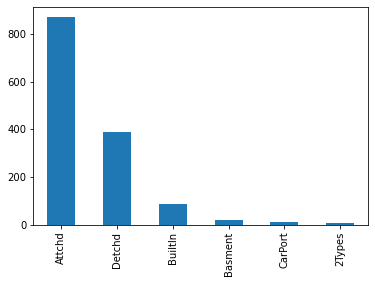

In [61]:
df['GarageType'].value_counts().plot.bar()
#Attchd was the most frequent value

In [68]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [66]:
most_freq_cols=['BsmtQual','FireplaceQu','GarageType']

In [71]:
def impute_nan(df,variable):
    most_frequent_variable=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_variable, inplace=True)

In [72]:
for feature in most_freq_cols:
    impute_nan(df,feature)

In [74]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64


#### Advantages

Easy To implement
Faster way to implement 

#### Disadvantages

Since we are using the more frequent labels, it may use them in an over respresented way,if there are many nan's
    It distorts the relation of the most frequent label



## Adding a variable to capture NAN

In [75]:
import pandas as pd
#we picked up the categorical features
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [76]:
def impute_nan(df,variable):
    most_frequent_variable=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_variable, inplace=True)

In [77]:
most_freq_cols=['BsmtQual','FireplaceQu','GarageType']

In [78]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
df['GarageType_var']=np.where(df['GarageType'].isnull(),1,0)

In [79]:
for feature in most_freq_cols:
    impute_nan(df,feature)

In [80]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0
5,Gd,Gd,Attchd,143000,0,1,0
6,Ex,Gd,Attchd,307000,0,0,0
7,Gd,TA,Attchd,200000,0,0,0
8,TA,TA,Detchd,129900,0,0,0
9,TA,TA,Attchd,118000,0,0,0


In [82]:
## Advantages
# we are giving ifeature-mportance to our nan values

#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [83]:
import pandas as pd
#we picked up the categorical features
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [85]:
def impute_nan(df,variable):
    df[variable+'newvar']=np.where(df[variable].isnull(),'Missing',df[variable])

In [86]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [87]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [88]:
df.drop(columns=['BsmtQual','FireplaceQu','GarageType'],axis=1)

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


# 2-Handle Categorical Features


### One Hot Encoding

In [91]:
import pandas as pd
df=pd.read_csv('Titanic.csv', usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [94]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [96]:
pd.get_dummies(df, drop_first=True)

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [98]:
## for Embarked
import pandas as pd
df=pd.read_csv('Titanic.csv', usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [99]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [106]:
df=df.Embarked.dropna()

In [108]:
df.unique()

array(['S', 'C', 'Q'], dtype=object)

In [109]:
pd.get_dummies(df, drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


### now if there are many categories using OneHotEncoding

In [113]:
import pandas as pd
import numpy as np
df=pd.read_csv('mercedes.csv', usecols=["X0","X1","X2","X3","X4","X5","X6"])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [114]:
for i in df.columns:
    print(i, len(df[i].unique()))

X0 47
X1 27
X2 44
X3 7
X4 4
X5 29
X6 12


In [122]:
#since there are many unique values so we are gonna pick the top 10 values
x1_list=list(df['X1'].value_counts(ascending=False).head(10).index)

In [124]:
for categories in x1_list:
    df[categories]=np.where(df['X1']==categories,1,0)

In [125]:
df.head(10)

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0
5,t,b,e,c,d,g,h,0,0,1,0,0,0,0,0,0,0
6,al,r,e,f,d,f,h,0,0,0,0,0,1,0,0,0,0
7,o,l,as,f,d,f,j,0,0,0,1,0,0,0,0,0,0
8,w,s,as,e,d,f,i,0,1,0,0,0,0,0,0,0,0
9,j,b,aq,c,d,f,a,0,0,1,0,0,0,0,0,0,0


### Ordinal Number Encoding

##### we encode by the help of the rank which we will define

In [1]:
import datetime

In [2]:
today_date=datetime.datetime.today()
today_date

datetime.datetime(2021, 9, 20, 23, 23, 25, 649303)

In [5]:
#timedelta helps you to find the difference between the datetime based on the paramenter in delta
today_date-datetime.timedelta(1)

datetime.datetime(2021, 9, 19, 23, 23, 25, 649303)

In [6]:
days=[today_date-datetime.timedelta(x) for x in range(15)]
days

[datetime.datetime(2021, 9, 20, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 19, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 18, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 17, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 16, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 15, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 14, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 13, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 12, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 11, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 10, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 9, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 8, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 7, 23, 23, 25, 649303),
 datetime.datetime(2021, 9, 6, 23, 23, 25, 649303)]

In [10]:
import pandas as pd
df=pd.DataFrame(days)
df.columns=['Day']
df.head()

,Day
0,2021-09-20 23:23:25.649303
1,2021-09-19 23:23:25.649303
2,2021-09-18 23:23:25.649303
3,2021-09-17 23:23:25.649303
4,2021-09-16 23:23:25.649303


In [20]:
#now to access the day,time,mnnth etc
df['Day'].dt.year
df['Day'].dt.weekday
df['Day'].dt.month
df['Day'].dt.hour

0     23
1     23
2     23
3     23
4     23
5     23
6     23
7     23
8     23
9     23
10    23
11    23
12    23
13    23
14    23
Name: Day, dtype: int64

In [24]:
#now if i want the weekday name
df['Weekday']=df["Day"].dt.day_name()
df.head()

,Day,Weekday
0,2021-09-20 23:23:25.649303,Monday
1,2021-09-19 23:23:25.649303,Sunday
2,2021-09-18 23:23:25.649303,Saturday
3,2021-09-17 23:23:25.649303,Friday
4,2021-09-16 23:23:25.649303,Thursday


In [25]:
import calendar
#this is the way to define the rank on the day names
dictionary=dict(zip(calendar.day_name,range(1,8)))

In [26]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [27]:
#here we are mapping the ranked days with our data
df['Week_Ordinal']=df['Weekday'].map(dictionary)

In [28]:
df.head(10)

,Day,Weekday,Week_Ordinal
0,2021-09-20 23:23:25.649303,Monday,1
1,2021-09-19 23:23:25.649303,Sunday,7
2,2021-09-18 23:23:25.649303,Saturday,6
3,2021-09-17 23:23:25.649303,Friday,5
4,2021-09-16 23:23:25.649303,Thursday,4
5,2021-09-15 23:23:25.649303,Wednesday,3
6,2021-09-14 23:23:25.649303,Tuesday,2
7,2021-09-13 23:23:25.649303,Monday,1
8,2021-09-12 23:23:25.649303,Sunday,7
9,2021-09-11 23:23:25.649303,Saturday,6


### Count Or Frequency Encoding

In [29]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
columns=[feature for feature in train_set.columns if train_set[feature].dtypes=='O']
columns=list(columns)

In [36]:
#here we are grabbing the categrol featrues
#i discarded 14 column because it was the numerical so we are not looking into it rightnow
#columns=columns.remove(14)
columns

[1, 3, 5, 6, 7, 8, 9, 13]

In [38]:
train_set=train_set[columns]

In [39]:
#here we are renaming our columns
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [40]:
train_set.head(10)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [44]:
for feature in train_set.columns:
    print(feature,':', len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [45]:
#here we converted our counrty into key value pairs and gave them ranks
country_map=train_set['Country'].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Trinadad&Tobago': 19,
 ' Cambodia': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [46]:
train_set['Country']=train_set["Country"].map(country_map)

In [47]:
train_set.head(10)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170



Advantages

    Easy To Use
    Not increasing feature space 
Disadvantages
    
    
    It will provide same weight if the frequencies are same



### Target Guided Ordinal Encoding

#####    Ordering the labels according to the target 
#####    Replace the labels by the joint probability of being 1 or 0



In [48]:
import pandas as pd
dataset=pd.read_csv('Titanic.csv',usecols=['Cabin','Survived'])
dataset.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [49]:
#now we replace nan with missing inshort creating a new category
dataset['Cabin'].fillna('Missing', inplace=True)

In [53]:
dataset['Cabin'].value_counts()

Missing        687
C23 C25 C27      4
B96 B98          4
G6               4
D                3
              ... 
D11              1
B101             1
D37              1
C91              1
A32              1
Name: Cabin, Length: 148, dtype: int64

In [56]:
#as you can see that the cabin has c23, d1 here c and d are the blocks in the titanic
#so we could pick those c and d etc only
dataset['Cabin']=dataset['Cabin'].astype(str).str[0]

In [58]:
dataset['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [59]:
#now we groupby our cabin wrt our survived
dataset.groupby(['Cabin'])['Survived'].mean()
#here we are getting that kisi person ka survive hone ka chance kitna ha agar wo kisi specific cabin se belong kre

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [69]:
ordinal_variables=dataset.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_variables

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [70]:
#here enumurate is assigning the values to our variables in cabin based on the mean values 
#eg: D was having the max survive chance so D will be having the max value T is having least
ordinal_labels2={k:i for i,k in enumerate(ordinal_variables,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [71]:
dataset['Cabin_Ordinal_values']=dataset['Cabin'].map(ordinal_labels2)

In [72]:
dataset.head(10)

,Survived,Cabin,Cabin_Ordinal_values
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1
5,0,M,1
6,0,E,7
7,0,M,1
8,1,M,1
9,1,M,1


### Mean Encoding

In [74]:
#converting our mean values to our dictionary
mean_ordinal=dataset.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [75]:
dataset['Mean_Ordinal']=dataset['Cabin'].map(mean_ordinal)

In [76]:
dataset.head(10)

,Survived,Cabin,Cabin_Ordinal_values,Mean_Ordinal
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854
5,0,M,1,0.299854
6,0,E,7,0.750000
7,0,M,1,0.299854
8,1,M,1,0.299854
9,1,M,1,0.299854


### Probability Ratio Encoding

##### 1. Probability of Survived based on Cabin--- Categorical Feature
##### 2.  Probability of Not Survived---1-pr(Survived)
##### 3.  pr(Survived)/pr(Not Survived)
#####  4. Dictonary to map cabin with probability
##### 5.  replace with the categorical feature


In [18]:
import pandas as pd
df=pd.read_csv('Titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [19]:
df['Cabin'].isnull().sum()

687

In [20]:
df['Cabin'].fillna('Missing' ,inplace=True)

In [21]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head(10)

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
5,0,M
6,0,E
7,0,M
8,1,M
9,1,M


In [22]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [23]:
prob_df=pd.DataFrame(prob_df)

In [24]:
prob_df.head(10)

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [25]:
prob_df['Died']=1-prob_df['Survived']
prob_df.head(10)

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [26]:
#Probablility ratio is the division of prob(survived)/prob(died)
prob_df['Probability Ratio']=prob_df['Survived']/prob_df['Died']

In [27]:
prob_df.head(10)

,Survived,Died,Probability Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [29]:
dic=prob_df['Probability Ratio'].to_dict()

In [30]:
dic

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [32]:
df['Cabin Encoded']=df['Cabin'].map(dic)

In [33]:
df.head(10)

,Survived,Cabin,Cabin Encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274


## 3-Outliers

## 4- Nomalization and Standardization


Transformation of Features

Why Transformation of Features Are Required and in which machine learning algo?

    Linear Regression---Gradient Descent ----Global Minima
    Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

We require it becz in some algorithms like: KNN we calculate the euclidean distance so
if our points are large so distance will be large as well but if we standardize distance
so it would become small as so with the gradient descent where we are calculating the 
minima

Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling) 
1.ANN--->GLobal Minima, Gradient 
2.CNN 
3.RNN

0-255 pixels



Types Of Transformation

1.    Normalization And Standardization
2.    Scaling to Minimum And Maximum values
3.    Scaling To Median And Quantiles
4.    Guassian Transformation Logarithmic Transformation Reciprocal Trnasformation Square Root Transformation Exponential Trnasformation Box Cox Transformation




### Standardization

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std


In [34]:
#picking up only integer vales
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [36]:
feature_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
feature_nan

['Age']

In [39]:
df.Age.fillna(df.Age.median(), inplace=True)

In [40]:
df.Age.isnull().sum()

0

In [41]:
df.head(10)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
5,0,3,28.0,8.4583
6,0,1,54.0,51.8625
7,0,3,2.0,21.0750
8,1,3,27.0,11.1333
9,1,2,14.0,30.0708


In [43]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [47]:
df_scaled.shape

(891, 4)

In [48]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

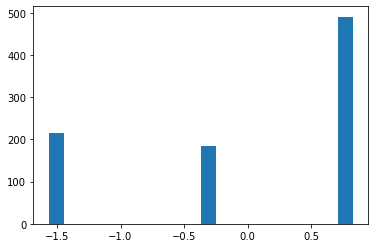

In [50]:
#we say select all features wrt to the 1 here 1 is for Pclass
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

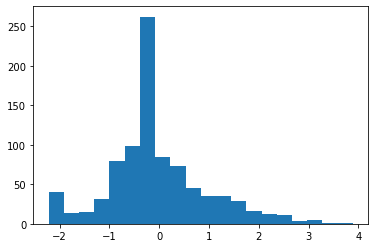

In [51]:
#here wrt to age
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

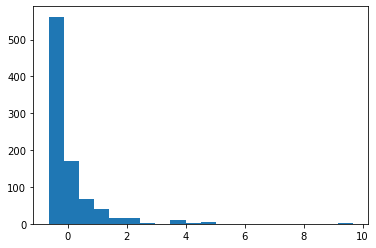

In [52]:
plt.hist(df_scaled[:,3],bins=20)

In [60]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [62]:
df_scaled[:,2]

array([-0.56573646,  0.66386103, -0.25833709,  0.4333115 ,  0.4333115 ,
       -0.1046374 ,  1.89345853, -2.10273333, -0.18148724, -1.18053521,
       -1.94903364,  2.2008579 , -0.71943615,  0.74071088, -1.18053521,
        1.97030837, -2.10273333, -0.1046374 ,  0.12591213, -0.1046374 ,
        0.4333115 ,  0.35646166, -1.10368536, -0.1046374 , -1.64163427,
        0.66386103, -0.1046374 , -0.79628599, -0.1046374 , -0.1046374 ,
        0.81756072, -0.1046374 , -0.1046374 ,  2.81565665, -0.1046374 ,
        0.97126041, -0.1046374 , -0.6425863 , -0.87313583, -1.18053521,
        0.81756072, -0.18148724, -0.1046374 , -2.02588348, -0.79628599,
       -0.1046374 , -0.1046374 , -0.1046374 , -0.1046374 , -0.87313583,
       -1.71848411, -0.6425863 ,  1.50920931, -0.02778756,  2.7388068 ,
       -0.1046374 , -0.6425863 , -0.06621248, -1.8721838 , -1.41108474,
       -0.56573646,  0.66386103,  1.20180994, -1.94903364, -0.1046374 ,
       -0.1046374 , -0.02778756, -0.79628599, -0.94998568, -0.25


### Min Max Scaling (### CNN)---Deep Learning Techniques

Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)


In [63]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax_df=pd.DataFrame(minmax.fit_transform(df), columns=df.columns)

In [64]:
minmax_df.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([ 24.,   6.,  14.,   3.,   7.,   8.,   6.,   3.,   7.,  22.,  13.,
         51.,  40.,  27.,  46.,  24.,  36., 224.,  27.,  35.,  17.,  34.,
         29.,  11.,  27.,   8.,  18.,   9.,  17.,  18.,   6.,  17.,   6.,
          9.,   7.,   2.,   7.,   4.,   7.,   4.,   3.,   1.,   0.,   2.,
          3.,   0.,   1.,   0.,   0.,   1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

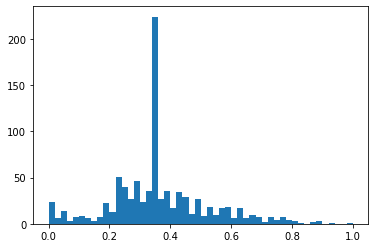

In [65]:
plt.hist(minmax_df['Age'], bins=50)

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

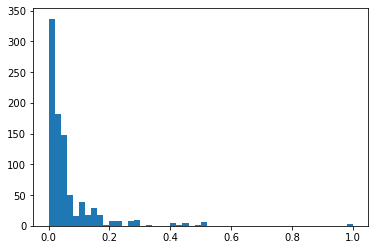

In [66]:
plt.hist(minmax_df['Fare'], bins=50)


### Robust Scaler

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR


In [67]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 24.,   6.,  14.,   3.,   7.,   8.,   6.,   3.,   7.,  22.,  13.,
         51.,  40.,  27.,  46.,  24.,  36., 224.,  27.,  35.,  17.,  34.,
         29.,  11.,  27.,   8.,  18.,   9.,  17.,  18.,   6.,  17.,   6.,
          9.,   7.,   2.,   7.,   4.,   7.,   4.,   3.,   1.,   0.,   2.,
          3.,   0.,   1.,   0.,   0.,   1.]),
 array([-2.12153846, -1.99910769, -1.87667692, -1.75424615, -1.63181538,
        -1.50938462, -1.38695385, -1.26452308, -1.14209231, -1.01966154,
        -0.89723077, -0.7748    , -0.65236923, -0.52993846, -0.40750769,
        -0.28507692, -0.16264615, -0.04021538,  0.08221538,  0.20464615,
         0.32707692,  0.44950769,  0.57193846,  0.69436923,  0.8168    ,
         0.93923077,  1.06166154,  1.18409231,  1.30652308,  1.42895385,
         1.55138462,  1.67381538,  1.79624615,  1.91867692,  2.04110769,
         2.16353846,  2.28596923,  2.4084    ,  2.53083077,  2.65326154,
         2.77569231,  2.89812308,  3.02055385,  3.14298462,  3.26541538,
 

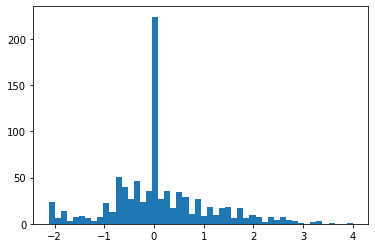

In [68]:
plt.hist(df_robust_scaler['Age'], bins=50)

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478, -0.18222992,  0.26154494,  0.7053198 ,  1.14909466,
         1.59286952,  2.03664438,  2.48041924,  2.9241941 ,  3.36796896,
         3.81174382,  4.25551868,  4.69929353,  5.14306839,  5.58684325,
         6.03061811,  6.47439297,  6.91816783,  7.36194269,  7.80571755,
         8.24949241,  8.69326727,  9.13704213,  9.58081699, 10.02459185,
        10.46836671, 10.91214157, 11.35591643, 11.79969129, 12.24346615,
        12.68724101, 13.13101587, 13.57479073, 14.01856559, 14.46234045,
        14.90611531, 15.34989017, 15.79366503, 16.23743989, 16.68121475,
        17.12498961, 17.56876447, 18.01253933, 18.45631418, 18.90008904,
 

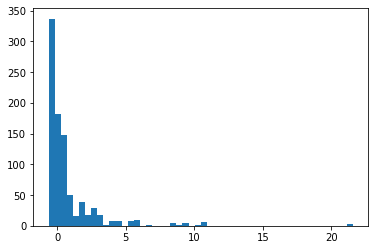

In [69]:
plt.hist(df_robust_scaler['Fare'], bins=50)


### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

1. logarithmic transformation
2. reciprocal transformation
3. square root transformation
4. exponential transformation (more general, you can use any exponent)
5. boxcox transformation



In [88]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [89]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [90]:
#### If you want to check whether feature is guassian or normal distributed we plot hist and q-q plot
import scipy.stats as stat
#pylab is uses numpy and matplot lib which process the mathematical calculation
import pylab

In [91]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    #since subplot means 1 row, 2nd column and 1 index because there will be 2 plots
    plt.subplot(1,2,1)
    df[feature].hist()
    #since subplot means 1 row, 2nd column and 2 index
    plt.subplot(1,2,2)
    #Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution
    #dist='norm means normal distribution, plot=pylab means pylab use kro becz of math calculation'
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

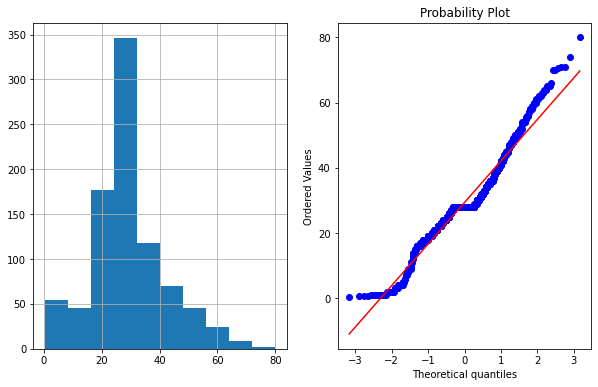

In [92]:
#agar probability plot ma saare points red line pe arhe ha it means normally distributed ha
plot_data(df,'Age')

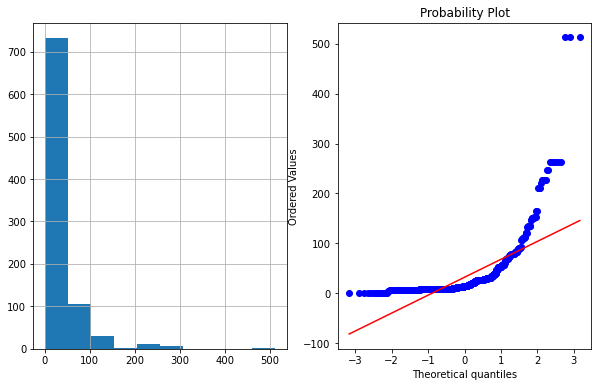

In [93]:
plot_data(df,'Fare')

### Logarithmic Transformation
now these are the ways to convert into an normal distribution

In [94]:
import numpy as np
df['Log_Age']=np.log(df['Age'])

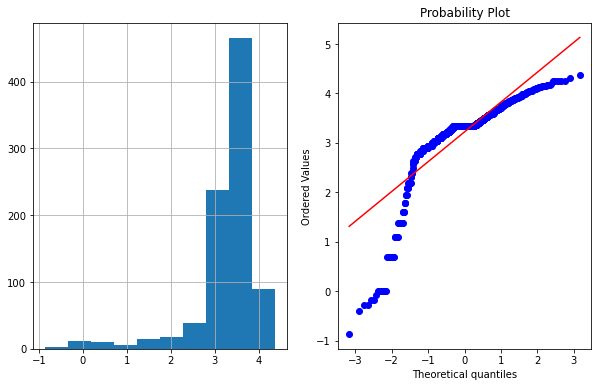

In [95]:
#as we can see that using log transformation it didnot follow the line so we wont be using
#this technique for age
plot_data(df,'Log_Age')

### Reciprocal Trnasformation

In [96]:
df['Age_reciprocal']=1/df['Age']
df.head()

,Survived,Age,Fare,Log_Age,Age_reciprocal
0,0,22.0,7.2500,3.091042,0.045455
1,1,38.0,71.2833,3.637586,0.026316
2,1,26.0,7.9250,3.258097,0.038462
3,1,35.0,53.1000,3.555348,0.028571
4,0,35.0,8.0500,3.555348,0.028571


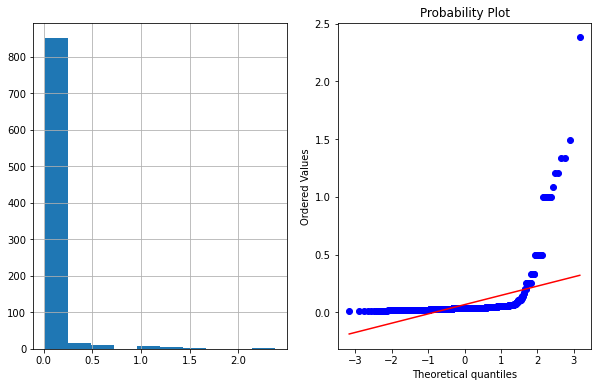

In [97]:
plot_data(df,'Age_reciprocal')
#it became right skewed but didnot followed the line

### Square Root Transformation

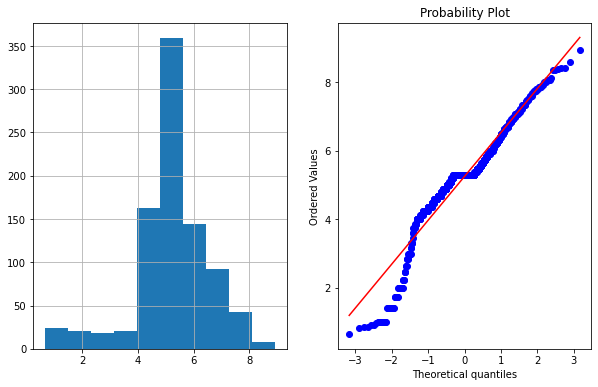

In [98]:
df['Age_square']=df['Age']**(1/2)
plot_data(df,'Age_square')
#this is following the line so can be used

### Exponential Transformation

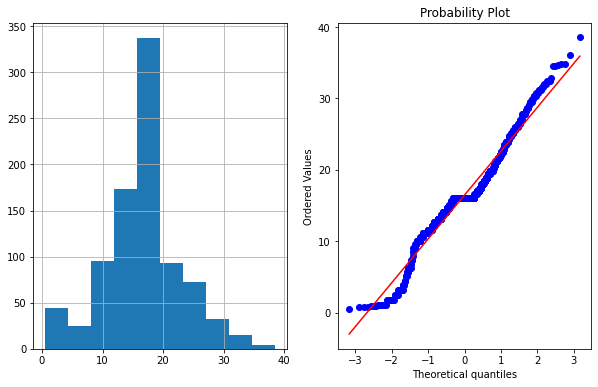

In [99]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')
#it is following the line as well


### BoxCOx Transformation

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.


In [100]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])
print(parameters)

0.7964531473656952


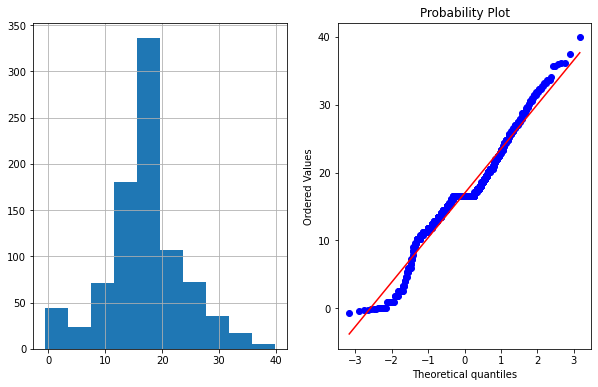

In [101]:
plot_data(df,'Age_Boxcox')

In [103]:
#log1p is used to take the log of x+1 incase we are having the 0 value
df['Log_fare']=np.log1p(df['Fare'])

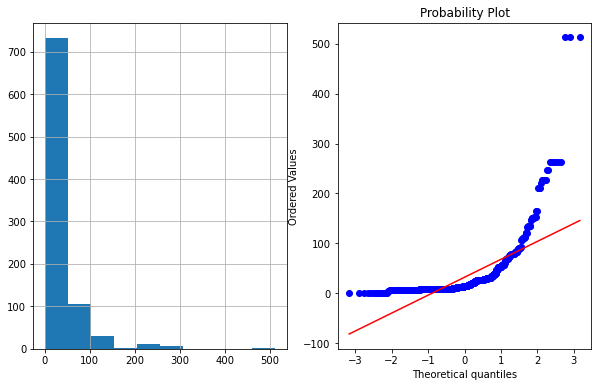

In [104]:
plot_data(df,'Fare')

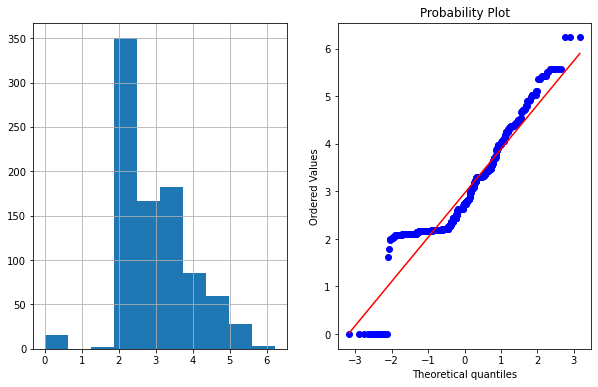

In [105]:
plot_data(df,'Log_fare')

# - Feature Selection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
dataset=pd.read_csv('mobile_dataset.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Univariate Selection

In [16]:
X=dataset.iloc[:,:-1]
y=dataset['price_range']

In [17]:
#selectkbest selects the features on your k value eg k=10 so it selects top 10 features
from sklearn.feature_selection import SelectKBest
#A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. The chi-square statistic compares the size any discrepancies between the expected results and the actual results,
#This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X
from sklearn.feature_selection import chi2

In [18]:
#apply selectkbest algo
#k can be of our choice as our total feaures are 20 so we wanna see that how those 20 features ranked
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [22]:
dfscores=pd.DataFrame(ordered_feature.scores_, columns=['Score'])

In [26]:
#now i want the col names as well with my scores
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [33]:
features_rank.columns=['Features','Scores']
features_rank

,Features,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [47]:
features_rank.sort_values(['Scores'],ascending=False)
#2nd way
#features_rank.nlargest(10,'Score')

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [44]:
print(model.feature_importances_)

[0.06035396 0.01948973 0.03189752 0.01972344 0.03107205 0.01753706
 0.03405238 0.03320636 0.03569005 0.03310132 0.03302874 0.04464716
 0.04753599 0.40627193 0.03345287 0.03315055 0.0327681  0.01421407
 0.01847388 0.02033283]


In [45]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features

battery_power    0.060354
blue             0.019490
clock_speed      0.031898
dual_sim         0.019723
fc               0.031072
four_g           0.017537
int_memory       0.034052
m_dep            0.033206
mobile_wt        0.035690
n_cores          0.033101
pc               0.033029
px_height        0.044647
px_width         0.047536
ram              0.406272
sc_h             0.033453
sc_w             0.033151
talk_time        0.032768
three_g          0.014214
touch_screen     0.018474
wifi             0.020333
dtype: float64

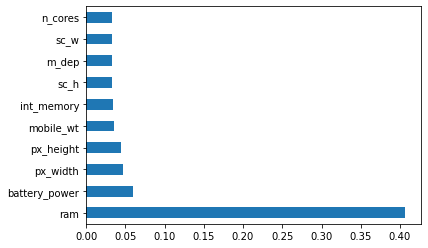

In [46]:
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

## Correlation

In [49]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<AxesSubplot:>

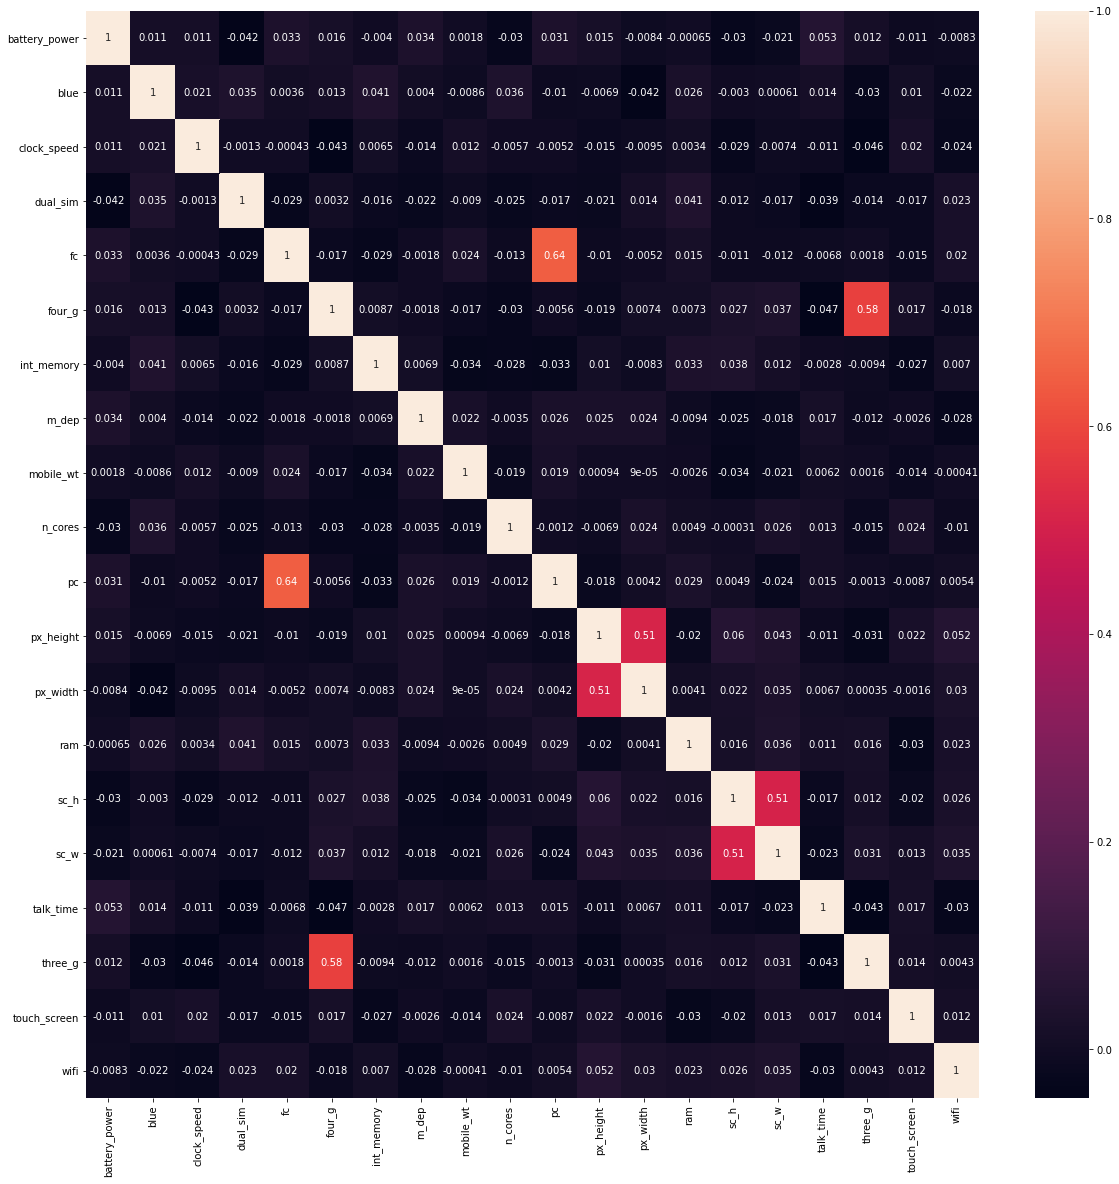

In [56]:
corr=dataset.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(dataset[top_features].corr(),annot=True)
#from the heatmap we can see that the 3g and 4g are highly correlated
#so if we drop one of them so it will not matter

In [111]:
#here we are setting the threshold corr if the feature corr is greater than this than one of the feature will be picked
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[j, i]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [112]:
threshold=0.5
correlation(dataset.iloc[:,:-1], threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [110]:
x=dataset.corr()
abs(x.iloc[1:3])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,0.008605,0.036161,...,0.006872,0.041533,0.026351,0.002952,0.000613,0.013934,0.030236,0.010061,0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,0.001315,0.000434,0.043073,0.006545,0.014364,0.012350,0.005724,...,0.014523,0.009476,0.003443,0.029078,0.007378,0.011432,0.046433,0.019756,0.024471,0.006606


In [107]:
for i in range(20):
    for j in range(i):
        print(i,j)

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
5 4
6 0
6 1
6 2
6 3
6 4
6 5
7 0
7 1
7 2
7 3
7 4
7 5
7 6
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
16 0
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16 14
16 15
17 0
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
17 11
17 12
17 13
17 14
17 15
17 16
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
19 0
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
19 15
19 16
19 17
19 18


### Information Gain

In [113]:
from sklearn.feature_selection import mutual_info_classif
# It calculates mutual information value for each of independent variables with respect to dependent variable, and selects the ones which has most information gain. In other words, it basically measures the dependency of features with the target value. The higher score means more dependent variables.

In [114]:
mutual_info=mutual_info_classif(X,y)

In [115]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)
#0 shows that there is no relationship

ram              0.847015
battery_power    0.030634
n_cores          0.030070
px_height        0.028281
px_width         0.027936
three_g          0.027833
int_memory       0.022094
sc_w             0.021988
pc               0.015039
fc               0.007471
m_dep            0.006483
touch_screen     0.005295
dual_sim         0.003169
mobile_wt        0.000000
blue             0.000000
four_g           0.000000
sc_h             0.000000
talk_time        0.000000
clock_speed      0.000000
wifi             0.000000
dtype: float64

# -Model Develop

## Hyper Parameter Tuning


#####    1-GridSearchCV
#####    2-RandomizedSearchCV
#####    3-Bayesian Optimization -Automate Hyperparameter Tuning (Hyperopt)
#####    4-Sequential Model Based Optimization(Tuning a scikit-learn estimator with skopt)
#####    5-Optuna- Automate Hyperparameter Tuning
#####    6-Genetic Algorithms (TPOT Classifier)

References

https://github.com/fmfn/BayesianOptimization
https://github.com/hyperopt/hyperopt
https://www.jeremyjordan.me/hyperparameter-tuning/
https://optuna.org/
https://towardsdatascience.com/hyperparameters-optimization-526348bb8e2d(By Pier PaoloIppolito)
https://scikit-optimize.github.io/stable/auto_examples/hyperparameter-optimization.html


In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Glucose']=np.where(df['Glucose']==0, df['Glucose'].median(),df['Glucose'])
df['Insulin']=np.where(df['Insulin']==0, df['Insulin'].median(),df['Insulin'])
df['SkinThickness']=np.where(df['SkinThickness']==0, df['SkinThickness'].median(),df['SkinThickness'])

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70,27.0,30.5,36.8,0.340,27,0
765,5,121.0,72,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60,23.0,30.5,30.1,0.349,47,1


In [5]:
#indepented and dependent
y=df['Outcome']
X=df.drop('Outcome',axis=1)

In [6]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[96 11]
 [17 30]]
0.8181818181818182
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154





The main parameters used by a Random Forest Classifier are:

##### .   criterion = the function used to evaluate the quality of a split.
##### .  max_depth = maximum number of levels allowed in each tree.
##### . max_features = maximum number of features considered when splitting a node.
##### .min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
##### .min_samples_split = minimum number of samples necessary in a node to cause node splitting.
##### .n_estimators = number of trees in the ensamble.



In [9]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
#this is the manual hyper parameter tuninig so there are some techniques

[[97 10]
 [17 30]]
0.8246753246753247
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       107
           1       0.75      0.64      0.69        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



### RandomSearchCV

##### randomsearchcv se jo best parameters ayenge wo hum apne grid search ko dedenge ko unko use krke best accuracy batao

In [10]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [11]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)
#CV(Cross-Validation):Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. ... That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the mode

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1400; total time=   6.7s
[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1400; total time=   6.9s
[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1400; total time=   5.1s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14,

[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   4.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1000; total time=   2.4s
[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1000; total time=   2.7s
[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1000; total time=   2.4s
[CV] END criterion=en

[CV] END criterion=entropy, max_depth=560, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   5.0s
[CV] END criterion=entropy, max_depth=560, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   5.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.6s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.8s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.8s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   5.0s
[CV] END criterion=

[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   5.2s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   5.4s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   5.9s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   5.6s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   4.5s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   4.5s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END criteri

[CV] END criterion=entropy, max_depth=780, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1200; total time=   2.8s
[CV] END criterion=gini, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1200; total time=   2.8s
[CV] END criterion=gini, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1200; total time=   2.8s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END criterion=gin

[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1600; total time=   3.6s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1600; total time=   3.6s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1000; total time=   2.3s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1000; total time=   2.3s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1000; total time=   2.2s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [12]:
#here we are getting the best parameters which we gave
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 670,
 'criterion': 'gini'}

In [13]:
#picking up the estimator which we used and it also tells those parametrs which tells that how do i have to create the my randomforestclassifier
#ye wo best parameters ha jo mere randomforest ma jayege
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(max_depth=670, min_samples_split=5, n_estimators=2000)

In [14]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[96 11]
 [14 33]]
Accuracy Score 0.8376623376623377
Classification report:               precision    recall  f1-score   support

           0       0.87      0.90      0.88       107
           1       0.75      0.70      0.73        47

    accuracy                           0.84       154
   macro avg       0.81      0.80      0.81       154
weighted avg       0.84      0.84      0.84       154



### Grid SearchCV

 It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)
#here i took some extra parameters as well taake mera gridsearchcv baaki values pe bhi jaye

{'criterion': ['gini'], 'max_depth': [670], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


In [18]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=1,verbose=2)
grid_search.fit(X_train,y_train)
#here n_iter is not present in gridsearchcv so how many iteration does it perform?
#it takes our paramters of param_grid eg:
#1*1*1*3*5*5=74
#jo bhi best parameters mere randomsearchcv se aye thay un ma se best parameters select krke
#hum grid ko dednge aur kuch values bhi un ma add krdeinge taake wo un ma se best param select kre

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1800; total time=   4.2s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1800; total time=   4.1s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1800; total time=   4.2s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1900; total time=   4.4s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1900; total time=   4.4s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1900; total time=   4.3s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimato

[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=2200; total time=   6.6s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=1800; total time=   4.4s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=1800; total time=   4.6s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=1800; total time=   4.4s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=1900; total time=   5.0s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=1900; total time=   4.8s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=1900; total time=   4.9s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=2200; total time=   5.4s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=1800; total time=   4.6s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=1800; total time=   4.7s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=1800; total time=   4.2s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=1900; total time=   4.6s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=1900; total time=   4.8s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=1900; total time=   4.4s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=2200; total time=   5.9s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1800; total time=   4.0s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1800; total time=   4.1s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1800; total time=   4.2s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1900; total time=   4.7s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1900; total time=   4.3s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1900; total time=   4.3s
[CV] END criterion=gini, max_depth

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini'], 'max_depth': [670],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [1800, 1900, 2000, 2100, 2200]},
             verbose=2)

In [19]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=670, min_samples_split=6, n_estimators=2200)

In [20]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[95 12]
 [12 35]]
Accuracy Score 0.8441558441558441
Classification report:               precision    recall  f1-score   support

           0       0.89      0.89      0.89       107
           1       0.74      0.74      0.74        47

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154




Automated Hyperparameter Tuning

Automated Hyperparameter Tuning can be done by using techniques such as

    Bayesian Optimization
    Gradient Descent
    Evolutionary Algorithms

### Bayesian Optimization

Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time. In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.

    Objective Function = defines the loss function to minimize.
    Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
    Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.



In [24]:
##pip install hyperopt
#fmin is responsible for minimizing our value
#tpe is our optimization algorithm
#hp is used to pick the values from space
#trials stores the history of what points were used
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [25]:
#hp.choice means ka in ma se koi eik value select kro
#hp.quniform is used to select number eg: 10,1200,12 select 10 numbers between 10-1200
#hp.uniform means to select the floating numbers
#we defined the space
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [42]:
#this is our objective function
#we called the randomforestclassifier aur usme wo parameter space wale dal diye
#ab ye best possible parameters select krega
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [30]:
import random

In [39]:
random.uniform(1,2)

1.9697910039144184

In [44]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,#this is my loss funct
            space= space, #defining space
            algo= tpe.suggest, #optimization algo is given
            max_evals = 80, #max evalution which should be given
            trials= trials)
best

100%|██████████| 80/80 [11:18<00:00,  8.48s/trial, best loss: -0.7671064907370386]


{'criterion': 0,
 'max_depth': 360.0,
 'max_features': 2,
 'min_samples_leaf': 0.07530459679591557,
 'min_samples_split': 0.025515273045153507,
 'n_estimators': 4}

In [45]:
#as you can see that max_features and n_estimators and criterion had numeric values
#but they take the string values such as criterion take 'entropy', 'gini'
#so we have to define a dictionary for it

In [46]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

entropy
log2
1200


In [47]:
#since now we got our best parameters so now we will put those parameters in our model and perform fit
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[98  9]
 [24 23]]
0.7857142857142857
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.72      0.49      0.58        47

    accuracy                           0.79       154
   macro avg       0.76      0.70      0.72       154
weighted avg       0.78      0.79      0.77       154




### Genetic Algorithms

Genetic Algorithms tries to apply natural selection mechanisms to Machine Learning contexts.

Let's immagine we create a population of N Machine Learning models with some predifined Hyperparameters. We can then calculate the accuracy of each model and decide to keep just half of the models (the ones that performs best). We can now generate some offsprings having similar Hyperparameters to the ones of the best models so that go get again a population of N models. At this point we can again caltulate the accuracy of each model and repeate the cycle for a defined number of generations. In this way, just the best models will survive at the end of the process.


In [7]:
##pip install tpot

import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [8]:
from tpot import TPOTClassifier
#generation is the number of iterations it needs
#population_size or N models ka kitne hamein models bana ne ha greater the population size so greater would be the results
#offspring size is ka kitne offspring hyperparamters ka bana ne ha so in description i told ka half pick krne ha so 12 here half of 24
#early_stops How many generations TPOT checks whether there is no improvement in optimization process.
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7621806298276886

Generation 2 - Current best internal CV score: 0.7621806298276886

Generation 3 - Current best internal CV score: 0.7621806298276886

Generation 4 - Current best internal CV score: 0.7621806298276886

Generation 5 - Current best internal CV score: 0.7621806298276886

Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=600), criterion=entropy, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=1600)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                 

In [15]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

0.8246753246753247


In [17]:
#predic=tpot_classifier.predict(X_test)


### Optimize hyperparameters of the model using Optuna

The hyperparameters of the above algorithm are n_estimators and max_depth for which we can try different values to see if the model accuracy can be improved. The objective function is modified to accept a trial object. This trial has several methods for sampling hyperparameters. We create a study to run the hyperparameter optimization and finally read the best hyperparameters.


In [26]:
##pip install optuna --user

import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=1, cv=3).mean()

  Using cached optuna-2.9.1-py3-none-any.whl (302 kB)
  Using cached cmaes-0.8.2-py3-none-any.whl (15 kB)
  Using cached colorlog-6.4.1-py2.py3-none-any.whl (11 kB)
  Using cached alembic-1.7.3-py3-none-any.whl (208 kB)
  Using cached cliff-3.9.0-py3-none-any.whl (80 kB)
  Using cached Mako-1.1.5-py2.py3-none-any.whl (75 kB)
  Using cached importlib_resources-5.2.2-py3-none-any.whl (27 kB)
  Using cached cmd2-2.2.0-py3-none-any.whl (144 kB)
  Using cached prettytable-2.2.0-py3-none-any.whl (23 kB)
  Using cached autopage-0.4.0-py3-none-any.whl (20 kB)
  Using cached stevedore-3.4.0-py3-none-any.whl (49 kB)
  Using cached pbr-5.6.0-py2.py3-none-any.whl (111 kB)
  Using cached pyperclip-1.8.2-py3-none-any.whl
  Using cached pyreadline3-3.3-py3-none-any.whl (95 kB)



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [27]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-09-23 15:11:10,479] A new study created in memory with name: no-name-e66fc25b-4f6c-43ce-bbce-abbc69672fb8
[I 2021-09-23 15:11:10,822] Trial 0 finished with value: 0.640068547744301 and parameters: {'classifier': 'SVC', 'svc_c': 1.0466210903169398e-09}. Best is trial 0 with value: 0.640068547744301.
[I 2021-09-23 15:11:10,963] Trial 1 finished with value: 0.640068547744301 and parameters: {'classifier': 'SVC', 'svc_c': 5.260216041462921}. Best is trial 0 with value: 0.640068547744301.
[I 2021-09-23 15:11:11,088] Trial 2 finished with value: 0.640068547744301 and parameters: {'classifier': 'SVC', 'svc_c': 0.002424043049290053}. Best is trial 0 with value: 0.640068547744301.
[I 2021-09-23 15:11:22,632] Trial 3 finished with value: 0.7540650406504065 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1580, 'max_depth': 14.580971937985018}. Best is trial 3 with value: 0.7540650406504065.
[I 2021-09-23 15:11:27,523] Trial 4 finished with value: 0.7540570699824646 and para

[I 2021-09-23 15:14:18,965] Trial 35 finished with value: 0.7540570699824646 and parameters: {'classifier': 'RandomForest', 'n_estimators': 540, 'max_depth': 23.641000946472815}. Best is trial 10 with value: 0.7556751155746851.
[I 2021-09-23 15:14:19,106] Trial 36 finished with value: 0.640068547744301 and parameters: {'classifier': 'SVC', 'svc_c': 113385.82242556551}. Best is trial 10 with value: 0.7556751155746851.
[I 2021-09-23 15:14:21,455] Trial 37 finished with value: 0.7573170731707317 and parameters: {'classifier': 'RandomForest', 'n_estimators': 320, 'max_depth': 11.917013648792365}. Best is trial 37 with value: 0.7573170731707317.
[I 2021-09-23 15:14:23,830] Trial 38 finished with value: 0.7475450342738722 and parameters: {'classifier': 'RandomForest', 'n_estimators': 320, 'max_depth': 10.873329088621274}. Best is trial 37 with value: 0.7573170731707317.
[I 2021-09-23 15:14:23,940] Trial 39 finished with value: 0.640068547744301 and parameters: {'classifier': 'SVC', 'svc_c': 

[I 2021-09-23 15:16:33,924] Trial 70 finished with value: 0.7491790212019768 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1470, 'max_depth': 76.81377733018132}. Best is trial 37 with value: 0.7573170731707317.
[I 2021-09-23 15:16:43,610] Trial 71 finished with value: 0.7491869918699187 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1380, 'max_depth': 10.927224611096491}. Best is trial 37 with value: 0.7573170731707317.
[I 2021-09-23 15:16:51,821] Trial 72 finished with value: 0.7491790212019768 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1170, 'max_depth': 13.921393979883938}. Best is trial 37 with value: 0.7573170731707317.
[I 2021-09-23 15:17:04,604] Trial 73 finished with value: 0.7491710505340348 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1820, 'max_depth': 26.961441442027844}. Best is trial 37 with value: 0.7573170731707317.
[I 2021-09-23 15:17:16,682] Trial 74 finished with value: 0.7491710505340348 and para

Accuracy: 0.7573170731707317
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 320, 'max_depth': 11.917013648792365}


In [28]:
trial.params

{'classifier': 'RandomForest',
 'n_estimators': 320,
 'max_depth': 11.917013648792365}

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=320,max_depth=12)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=320)

In [35]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))

0.8181818181818182


In [37]:
#from sklearn import metrics
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))


MSE: 0.18181818181818182


# Imbalanced Data
it occurs when our label had classify values like 0 and 1 and if you had 90% of values of 0
and only 10% of values as an 1 it means you got an imbalanced dataset.
it occurs in classification problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
#independent and dependent variable
X=df.drop('Class',axis=1)
y=df.Class

In [6]:
## first we perform the modeling with no technique to deal imbalance data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#KFold is a cross-validation technique
from sklearn.model_selection import KFold
#here gridsearchcv is used for hyperparameter tuninig
from sklearn.model_selection import GridSearchCV

In [14]:
log_class=LogisticRegression()
#here grid is made for parametrs of logistic regression and hyper parameter tunining
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
#kfold is called as an cross-validation
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [13]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [16]:
#f1_macro is a scoring technique just as we just Accuracy as technique
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [17]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
#here the score is very excellent but the problem is our false positive and false negative which is 38 and 60 we need to reduce those numbers
#the score in 99 percent because of imbalance dataset

[[85272    38]
 [   60    73]]
0.9988530365272755
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85310
           1       0.66      0.55      0.60       133

    accuracy                           1.00     85443
   macro avg       0.83      0.77      0.80     85443
weighted avg       1.00      1.00      1.00     85443



### RandomForest
our first technique is the randomforest becasuse it works on the multiple decision trees so it eliminates the imbalanced data

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85306     4]
 [   37    96]]
0.9995201479348805
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85310
           1       0.96      0.72      0.82       133

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
#in the randomforest there is a parameter called class weight
class_weight_1=dict({0:1,1:100})
#here we tell ka agar 0 aye tu uski importance 1 hogi and if agar 1 aye tu uski importance 100 hogi
#becz 1 hmare pass kam ha as compared to 0


In [22]:
class_weight_1=dict({0:1,1:100})
classifier=RandomForestClassifier(class_weight=class_weight_1)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85305     5]
 [   39    94]]
0.9994850368081645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85310
           1       0.95      0.71      0.81       133

    accuracy                           1.00     85443
   macro avg       0.97      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### UnderSampling
in undersampling what we do is that we just reduce the size of that particular value that is most occured for eg: in our scenario where 0 is occured more so it will reduce the 0 occurences which is practically not encouraged if you had small data then it is ok

In [31]:
##pip install imblearn
#here counter is imported becz we want to display our key value pairs like 0:no.of occurence, 1: no.of occurence
from collections import Counter
from imblearn.under_sampling import NearMiss
#here 0.8 is the percentage which corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling.
#0.8 keheta ha ka majority class ka 80 percent nikalo aur minority ko dedo 0.8* 512=359
ns=NearMiss(0.7)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199005, 1: 359})
The number of classes after fit Counter({0: 512, 1: 359})


In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [39]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
#here you can see that we trained the data using undersampled technique but the results were not satisfying

[[67207 18103]
 [   18   115]]
0.7879170909261145
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     85310
           1       0.01      0.86      0.01       133

    accuracy                           0.79     85443
   macro avg       0.50      0.83      0.45     85443
weighted avg       1.00      0.79      0.88     85443



### OverSampling

In [44]:
from imblearn.over_sampling import RandomOverSampler

In [45]:
#in oversampler the ratio of the minority is increased by multiplying the majority with 0.75
#in our case it is 199005*0.75=149253
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199005, 1: 359})
The number of classes after fit Counter({0: 199005, 1: 149253})


In [46]:
199005*0.75

149253.75

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [48]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85305     5]
 [   36    97]]
0.9995201479348805
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85310
           1       0.95      0.73      0.83       133

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### SMOTETomek
as we say in previous methods that they were just resampling but smotetomek is used to create new points wrt to the points which were near it combines the under and over sampling of data

In [8]:
from imblearn.combine import SMOTETomek

In [20]:
#here we are saying that to resample our data to 75 percent  it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling.
from collections import Counter
os=SMOTETomek(0.5)
X_train_ns,y_train_ns=os.fit_resample(X_train1,y_train1)
print("The number of classes before fit {}".format(Counter(y_train1)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 28430, 1: 50})
The number of classes after fit Counter({0: 27644, 1: 13429})


In [17]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,train_size=0.1)

In [18]:
y_train1.value_counts()

0    28430
1       50
Name: Class, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [22]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85285    14]
 [   27   117]]
0.9995201479348805
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.89      0.81      0.85       144

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

